In [2]:
!pip install wordcloud textblob snownlp jieba

                                              0.0/300.2 kB ? eta -:--:--
     ---                                   30.7/300.2 kB 660.6 kB/s eta 0:00:01
     ---                                   30.7/300.2 kB 660.6 kB/s eta 0:00:01
     ----------                            81.9/300.2 kB 508.4 kB/s eta 0:00:01
     -------------                        112.6/300.2 kB 656.4 kB/s eta 0:00:01
     --------------------                 174.1/300.2 kB 697.2 kB/s eta 0:00:01
     -----------------------------        245.8/300.2 kB 885.4 kB/s eta 0:00:01
     ---------------------------------    276.5/300.2 kB 850.6 kB/s eta 0:00:01
     ------------------------------------ 300.2/300.2 kB 883.9 kB/s eta 0:00:00


#  **本文档对爬取到的武汉市1300家酒店/民宿 约15000个评论进行分析和可视化，这些图表可用于城市地理与旅游管理等相关方面的研究-----------2024.07.10--Hjx**
实际上评论数量应约为100万条，由于携程网站的反爬机制，时间和资源限制，暂时先只获取了每个酒店民宿的一些评论

## 1.评论发布的时间、地点情况以及评论长度与评论数量情况

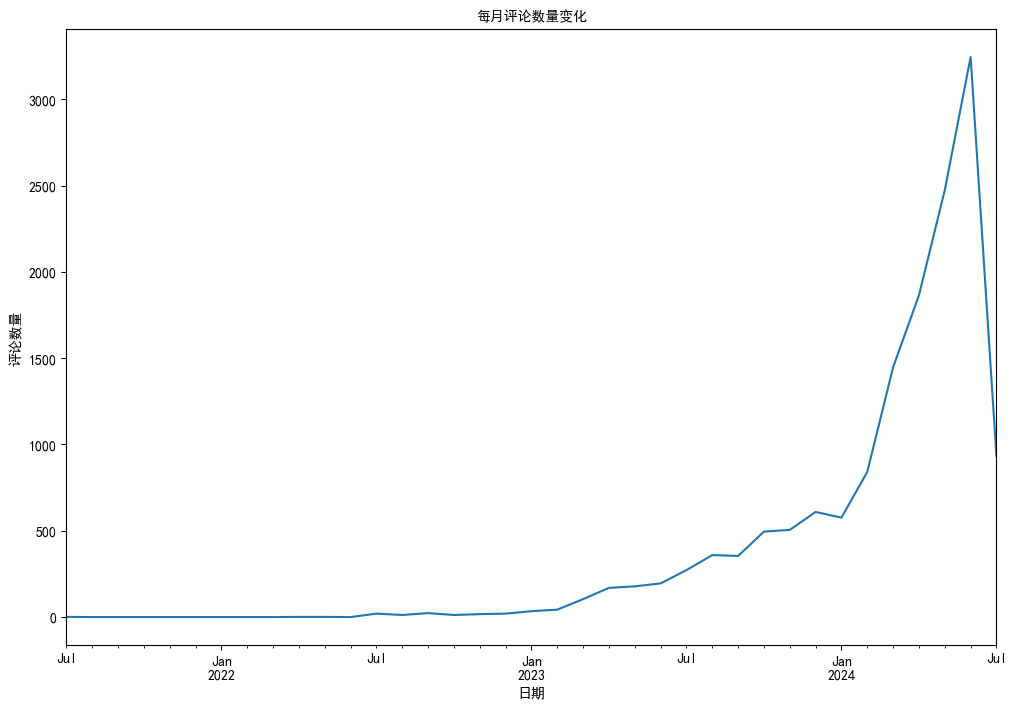

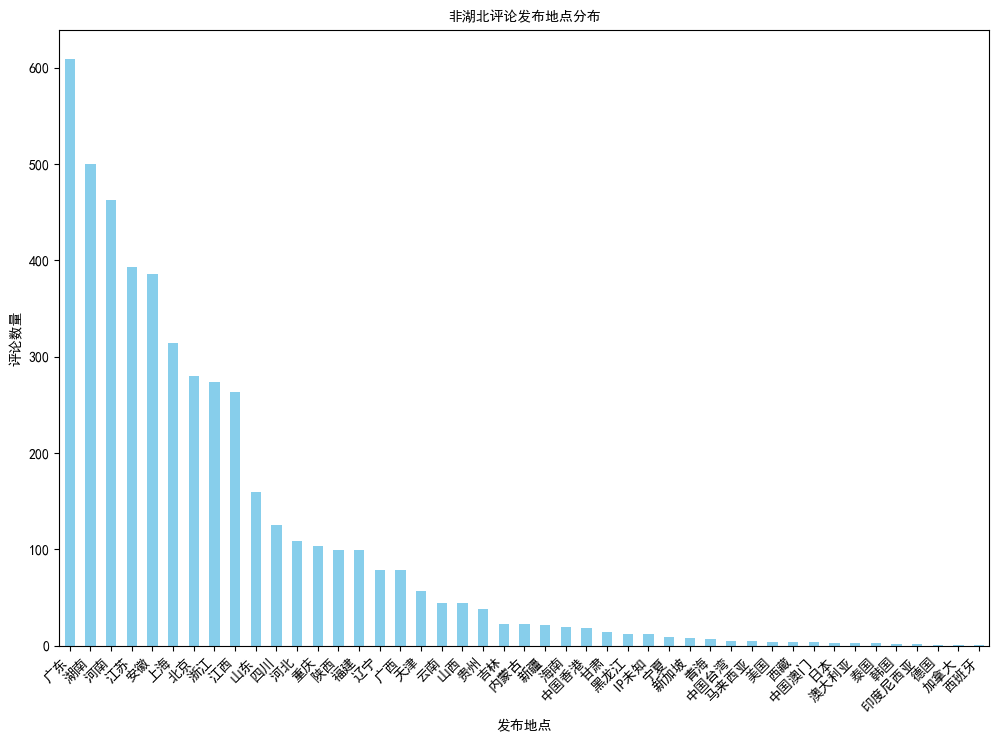

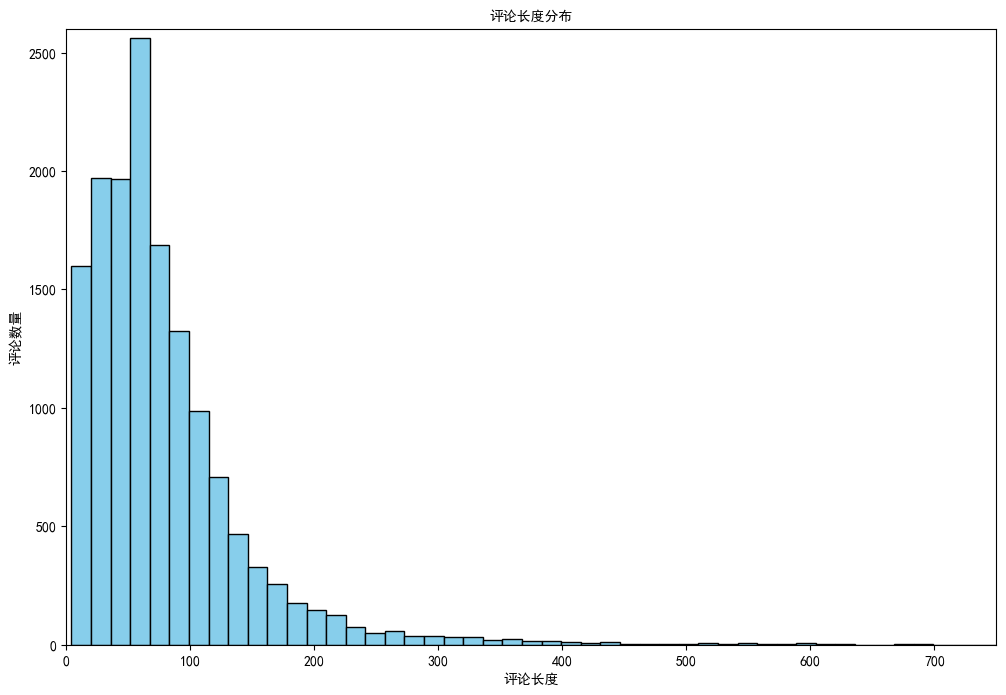

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')

# 转换发布日期为日期类型
df['发布日期'] = pd.to_datetime(df['发布日期'])

# 按月统计评论数量
monthly_reviews = df.set_index('发布日期').resample('M')['酒店ID'].count()

# 绘制时间序列图
plt.figure(figsize=(12, 8))
monthly_reviews.plot()
plt.title('每月评论数量变化', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('评论数量', fontproperties=font_prop)
plt.show()


# 清除“发布于”
df['发布地点'] = df['发布地点'].str.replace('发布于', '')

# 排除湖北的评论
non_hubei_reviews = df[df['发布地点'] != '湖北']

# 按发布地点统计评论数量
location_reviews = non_hubei_reviews['发布地点'].value_counts()

# 绘制柱状图
plt.figure(figsize=(12, 8))
location_reviews.plot(kind='bar', color='skyblue')
plt.title('非湖北评论发布地点分布', fontproperties=font_prop)
plt.xlabel('发布地点', fontproperties=font_prop)
plt.ylabel('评论数量', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right')
plt.show()



# 计算每条评论的长度
df['评论长度'] = df['酒店评论'].apply(len)

# 绘制直方图
plt.figure(figsize=(12, 8))
df['评论长度'].hist(bins=200, color='skyblue', edgecolor='black')
plt.title('评论长度分布', fontproperties=font_prop)
plt.xlabel('评论长度', fontproperties=font_prop)
plt.ylabel('评论数量', fontproperties=font_prop)
# 设置x轴和y轴的范围
plt.xlim(0, 750) 
plt.ylim(0, 2600) 
plt.grid(False)
plt.show()


# 2.评论分析-词云
## 2.1使用全部评论数据构建词云图

Processing Comments: 14801it [00:00, 824412.28it/s]


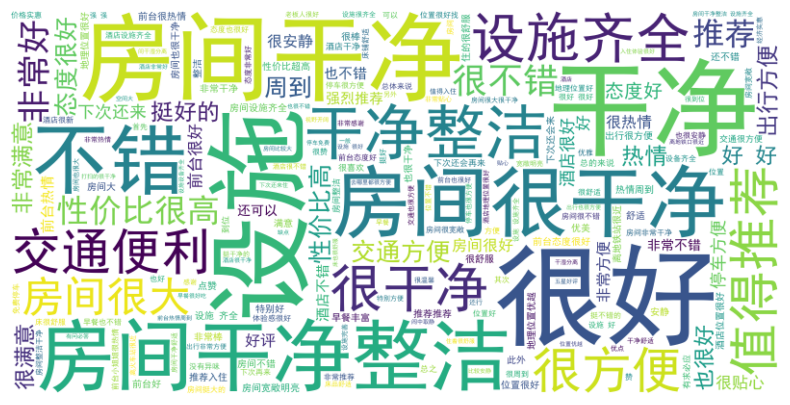

In [64]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')
comments = df['酒店评论'].dropna()  # 确保去除任何空值


filtered_comments = (comment.replace('卫生', '').replace('环境', '').replace('服务', '') 
                     for comment in comments)
text = ' '.join(tqdm(filtered_comments, desc="Processing Comments"))


font_path = 'C:/Windows/Fonts/simhei.ttf'  # 黑体

# 创建词云对象
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    font_path=font_path  # 使用支持中文的字体
).generate(text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()


# 2.评论分析-词云
## 2.2使用酒店民宿图像进行词云图像掩膜

Processing Comments: 14801it [00:00, 1643194.64it/s]


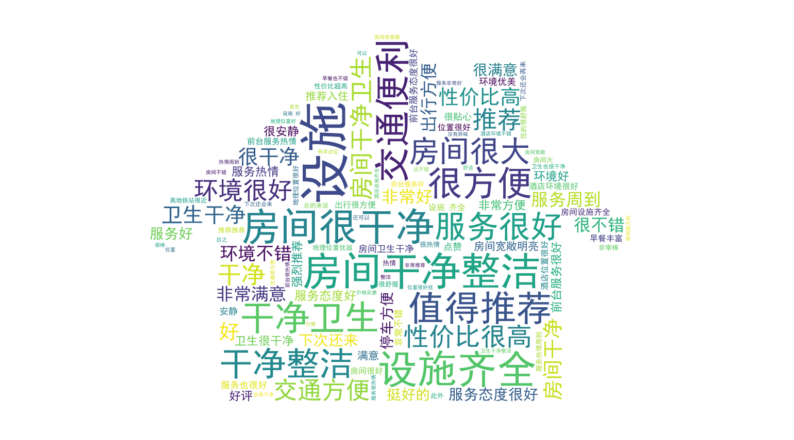

In [66]:
import numpy as np
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm

# 加载形状图像作为词云的掩模
mask_image = np.array(Image.open(r'amywork/DA.png'))

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')
comments = df['酒店评论'].dropna()  # 确保去除任何空值

# 清理文本生成词汇串
stopwords = set(STOPWORDS)
custom_stopwords = {'卫生', '环境', '服务', '很好', '非常', '酒店', '不错', '感觉', '时候', '不过'}
stopwords.update(custom_stopwords)

filtered_comments = (comment.replace(' ', '') for comment in comments)
text = ' '.join(tqdm(filtered_comments, desc="Processing Comments"))


font_path = 'C:/Windows/Fonts/simhei.ttf'  # 黑体

# 创建词云对象
wordcloud = WordCloud(
    width=800, height=800,
    background_color='white',
    mask=mask_image,
    font_path=font_path,
    stopwords=stopwords,
    max_words=200,
    min_font_size=10,
    max_font_size=100,
    contour_width=0,
    contour_color='steelblue'
).generate(text)

# 显示词云图
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 2.评论分析-词云
## 2.3字词与图像优化

Processing Comments: 14801it [00:00, 1236281.86it/s]


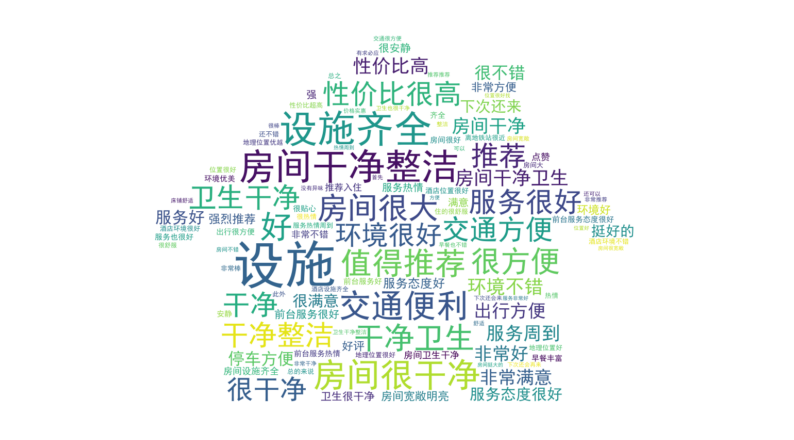

In [71]:
import numpy as np
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm

# 加载形状图像作为词云的掩模
mask_image = np.array(Image.open(r'amywork/DA.png'))

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')
comments = df['酒店评论'].dropna()  # 确保去除任何空值


stopwords = set(STOPWORDS)
custom_stopwords = {'卫生', '环境', '服务', '很好', '非常', '酒店', '不错', '感觉', '时候', '不过', '还是', '就是'}
stopwords.update(custom_stopwords)

filtered_comments = (comment.replace(' ', '') for comment in comments)
text = ' '.join(tqdm(filtered_comments, desc="Processing Comments"))

font_path = 'C:/Windows/Fonts/simhei.ttf'  # 黑体

# 创建词云对象
wordcloud = WordCloud(
    width=800, height=800,
    background_color='white',
    mask=mask_image,
    font_path=font_path,
    stopwords=stopwords,
    max_words=500,  # 增加最大词数
    min_font_size=10,
    max_font_size=100,
    contour_width=0,
    contour_color='steelblue',
    collocations=False,  # 避免重复词语
    prefer_horizontal=1.0  # 更倾向于水平显示
).generate(text)

# 显示词云图
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3.使用SnowNLP对所有评论进行情感分析，然后依据情感分析的分类重新绘制不同情感的词云

Processing Sentiments: 100%|█████████████████████████████████████████████████████| 14801/14801 [04:41<00:00, 52.58it/s]


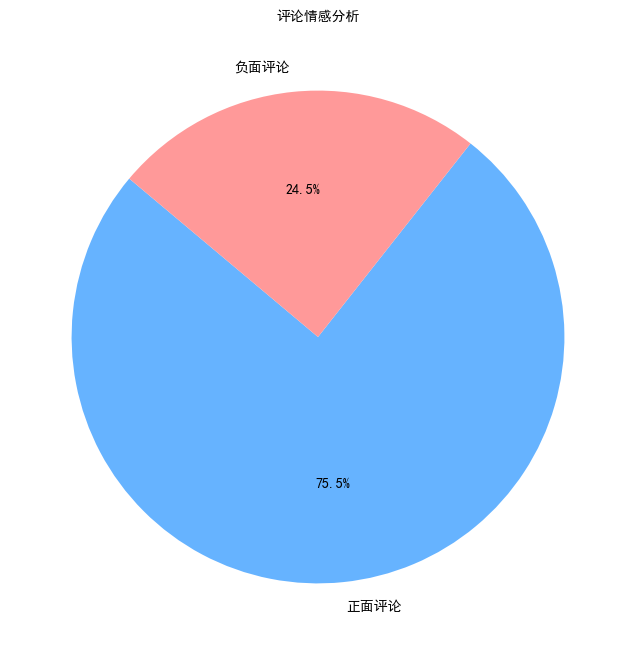

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from snownlp import SnowNLP
from matplotlib.font_manager import FontProperties
from tqdm import tqdm
font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')

# 使用SnowNLP进行情感分析
tqdm.pandas(desc="Processing Sentiments")
df['情感得分'] = df['酒店评论'].progress_apply(lambda x: SnowNLP(x).sentiments)

# 分类正面和负面评论，情感得分大于0.5为正面，小于等于0.5为负面
positive_reviews = df[df['情感得分'] > 0.5]
negative_reviews = df[df['情感得分'] <= 0.5]

# 绘制饼图（单一颜色）
plt.figure(figsize=(8, 8))
colors = ['#66b3ff', '#ff9999']
plt.pie([len(positive_reviews), len(negative_reviews)], labels=['正面评论', '负面评论'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('评论情感分析', fontproperties=font_prop)
plt.show()



Processing Sentiments: 100%|█████████████████████████████████████████████████████| 14801/14801 [04:22<00:00, 56.38it/s]


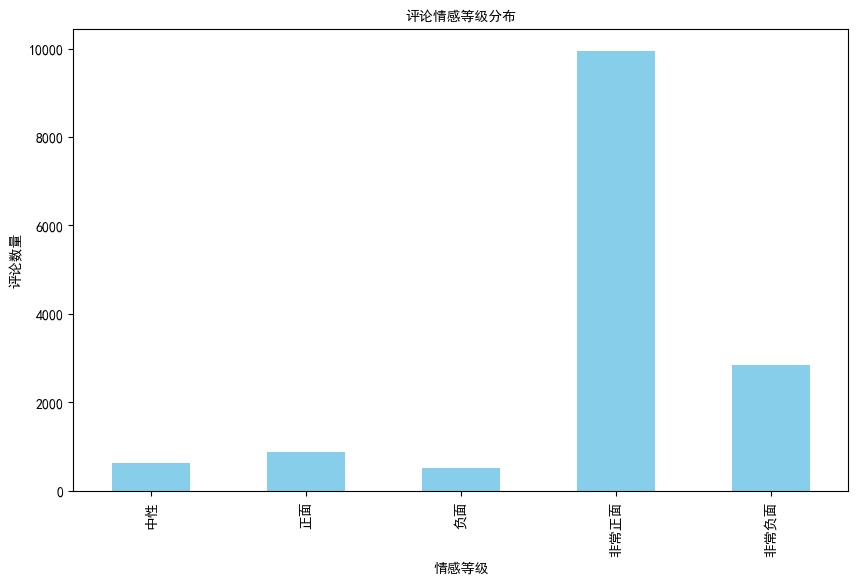

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from snownlp import SnowNLP
from tqdm import tqdm
from matplotlib.font_manager import FontProperties


font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False   

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')

# 使用SnowNLP进行情感分析并显示进度条
tqdm.pandas(desc="Processing Sentiments")
df['情感得分'] = df['酒店评论'].progress_apply(lambda x: SnowNLP(x).sentiments)

# 情感得分等级
def categorize_sentiment(score):
    if score <= 0.2:
        return '非常负面'
    elif score <= 0.4:
        return '负面'
    elif score <= 0.6:
        return '中性'
    elif score <= 0.8:
        return '正面'
    else:
        return '非常正面'

df['情感等级'] = df['情感得分'].apply(categorize_sentiment)

# 统计每个情感等级的评论数量
sentiment_counts = df['情感等级'].value_counts().sort_index()

# 绘制柱状图
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('评论情感等级分布', fontproperties=font_prop)
plt.xlabel('情感等级', fontproperties=font_prop)
plt.ylabel('评论数量', fontproperties=font_prop)
plt.show()


Processing Sentiments: 100%|█████████████████████████████████████████████████████| 14801/14801 [03:31<00:00, 69.93it/s]


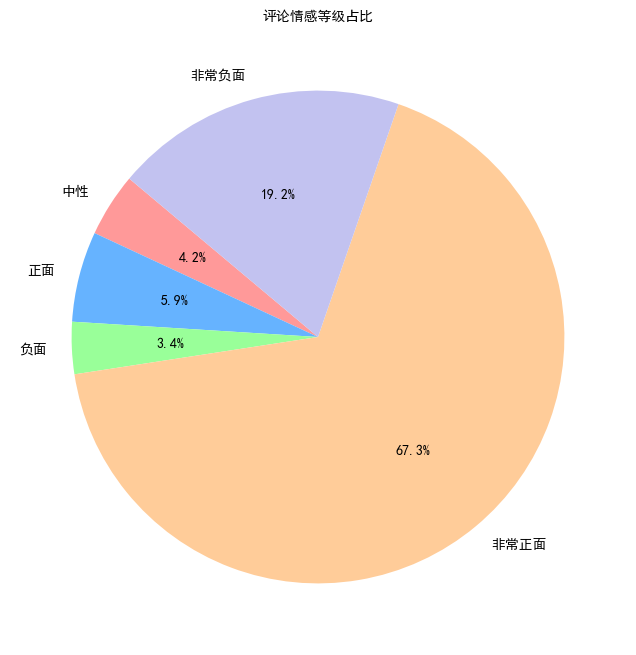

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from snownlp import SnowNLP
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
from tqdm import tqdm


font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False    

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')

# 使用SnowNLP进行情感分析并显示进度条
tqdm.pandas(desc="Processing Sentiments")
df['情感得分'] = df['酒店评论'].progress_apply(lambda x: SnowNLP(x).sentiments)

def categorize_sentiment(score):
    if score <= 0.2:
        return '非常负面'
    elif score <= 0.4:
        return '负面'
    elif score <= 0.6:
        return '中性'
    elif score <= 0.8:
        return '正面'
    else:
        return '非常正面'

df['情感等级'] = df['情感得分'].apply(categorize_sentiment)

# 统计每个情感等级的评论数量
sentiment_counts = df['情感等级'].value_counts().sort_index()

# 绘制情感等级占比饼状图
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('评论情感等级占比', fontproperties=font_prop)
plt.show()




Generating Wordclouds: 100%|█████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.13s/it]


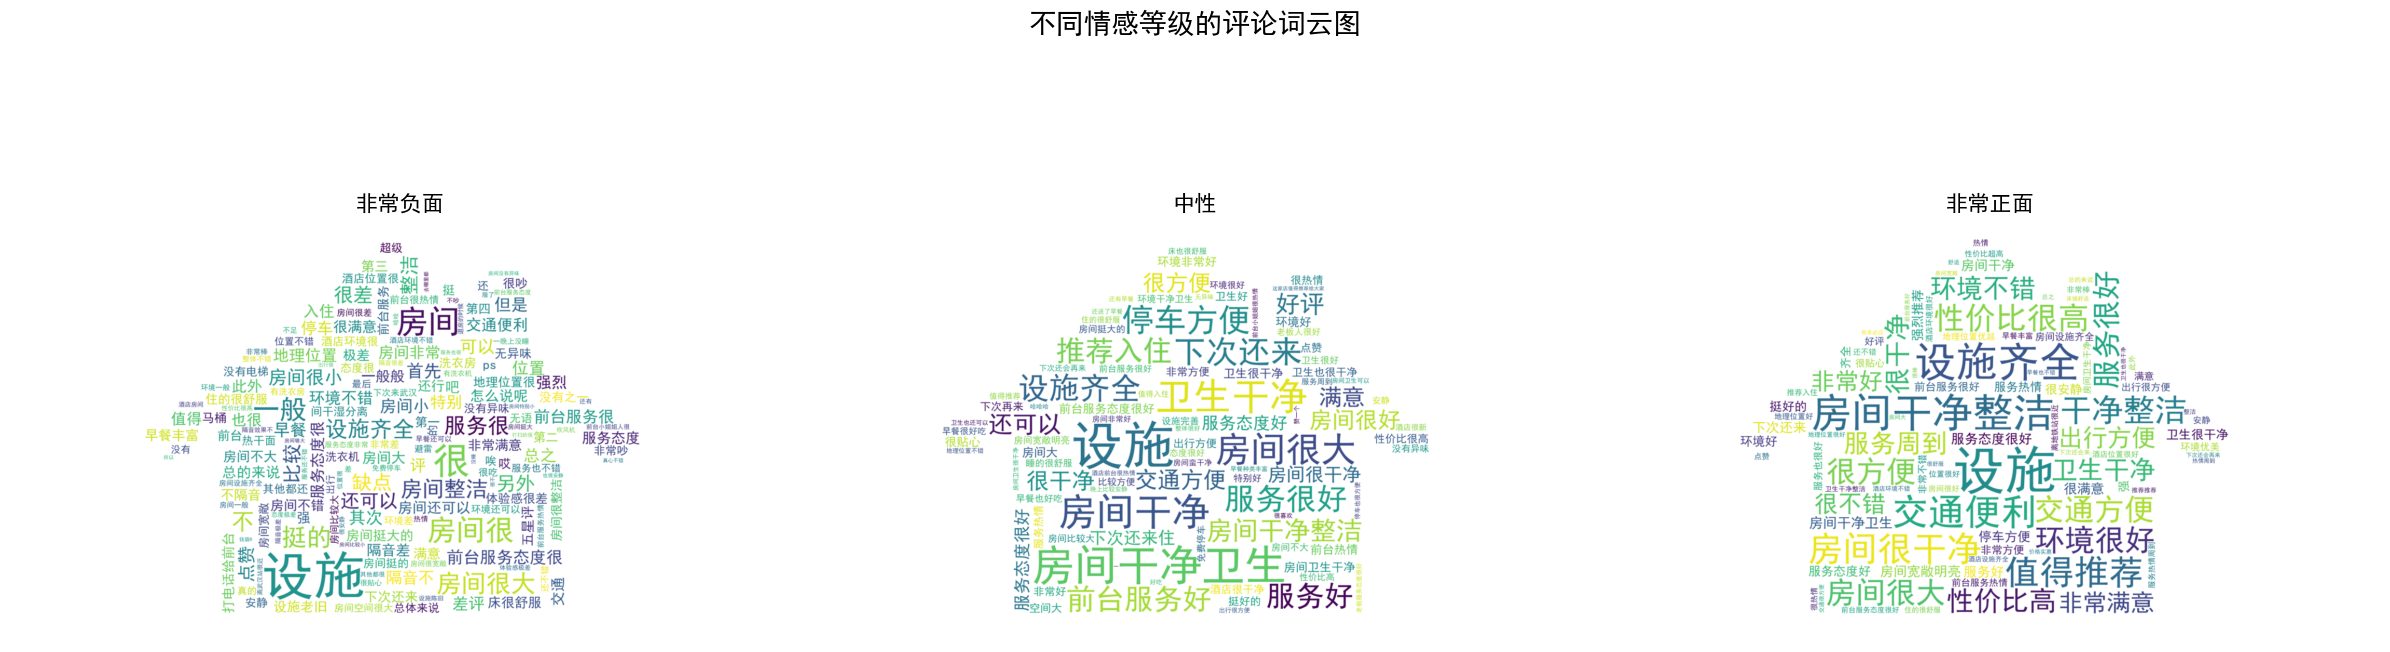

In [130]:
# 清理文本并生成词汇串
stopwords = set(STOPWORDS)
custom_stopwords = {'卫生', '环境', '服务', '很好', '非常', '酒店', '不错', '感觉', '时候', '不过', '还是', '就是'}
stopwords.update(custom_stopwords)

# 为非常负面评论添加额外的停用词
extra_stopwords = {'非常感谢', '方便', '卫生', '干净', '干净卫生', '推荐', '好', '优点'}
stopwords.update(extra_stopwords)

# 为每个情感等级生成词云图
mask_image = np.array(Image.open(r'amywork/DA.png'))

# 创建词云对象的函数
def generate_wordcloud(text, mask_image, font_path):
    wordcloud = WordCloud(
        width=800, height=800,
        background_color='white',
        mask=mask_image,
        font_path=font_path,
        stopwords=stopwords,
        max_words=200,
        min_font_size=10,
        max_font_size=100,
        contour_width=0,
        contour_color='steelblue',
        collocations=False
    ).generate(text)
    return wordcloud

# 为每个情感等级生成词云
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 创建1行3列的图框
fig.suptitle('不同情感等级的评论词云图', fontproperties=font_prop, fontsize=20)

categories = ['非常负面', '中性', '非常正面']
positions = [0, 1, 2]

for category, pos in tqdm(zip(categories, positions), total=len(categories), desc="Generating Wordclouds"):
    comments = df[df['情感等级'] == category]['酒店评论'].dropna()
    
    if category == '非常负面':
        filtered_comments = []
        for comment in comments:
            for word in extra_stopwords:
                comment = comment.replace(word, '')
            filtered_comments.append(comment.replace(' ', ''))
    else:
        filtered_comments = [comment.replace(' ', '') for comment in comments]
    
    text = ' '.join(filtered_comments)
    wordcloud = generate_wordcloud(text, mask_image, font_path)
    
    ax = axes[pos]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(category, fontproperties=font_prop, fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 4.LDA主题建模

LDA（Latent Dirichlet Allocation，潜在狄利克雷分布）是种主题模型，用于从大量文档中发现潜在的主题
假设每个文档由多个主题混合组成，每个主题由一组词语组成。LDA通过分析词语的共现模式，揭示这些隐藏的主题
通过LDA主题建模，可以将大量的文本数据归纳为几个主要的主题，帮助理解顾客关心的重点
----模型输出的每个主题包含一组高频词，这些词描述该主题的主要内容。

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import jieba

# 对评论文本进行分词
df['分词'] = df['酒店评论'].apply(lambda x: ' '.join(jieba.cut(x)))

# 使用CountVectorizer进行文本向量化
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['分词'])

# 使用LDA进行主题建模
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# 打印每个主题的前10个词
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("主题 #%d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)


主题 #1:
房间 酒店 没有 前台 但是 就是 一个 可以 入住 晚上
主题 #2:
酒店 前台 房间 非常 服务 方便 入住 免费 特别 干净
主题 #3:
房间 干净 不错 服务 卫生 环境 设施 非常 酒店 方便
主题 #4:
酒店 方便 可以 就是 房间 武汉 比较 位置 不错 附近
主题 #5:
酒店 好好 非常 服务 舒适 入住 这家 体验 设施 武汉



## 5.高频二元、三元词组
可用于帮助理解顾客在评价中**常用的组合表达**，可以提炼出客户对酒店服务的具体期望和满意度

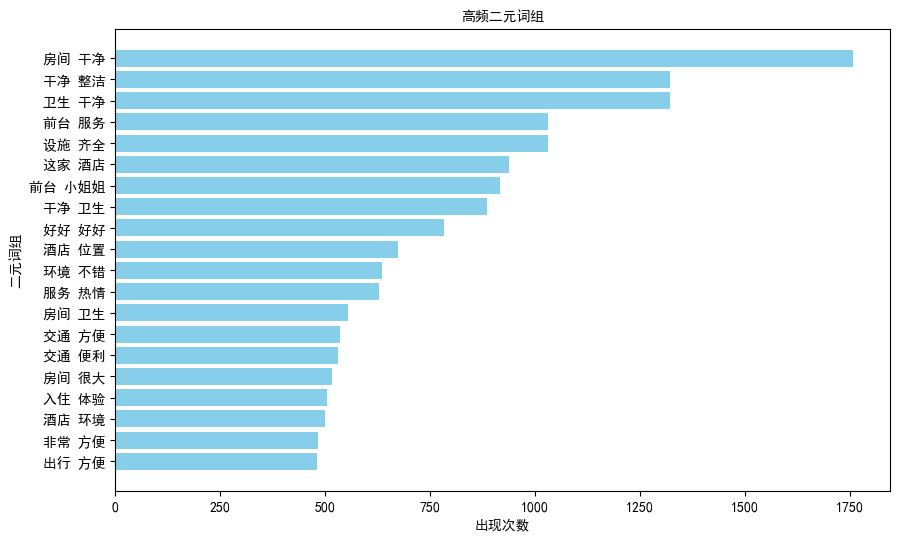

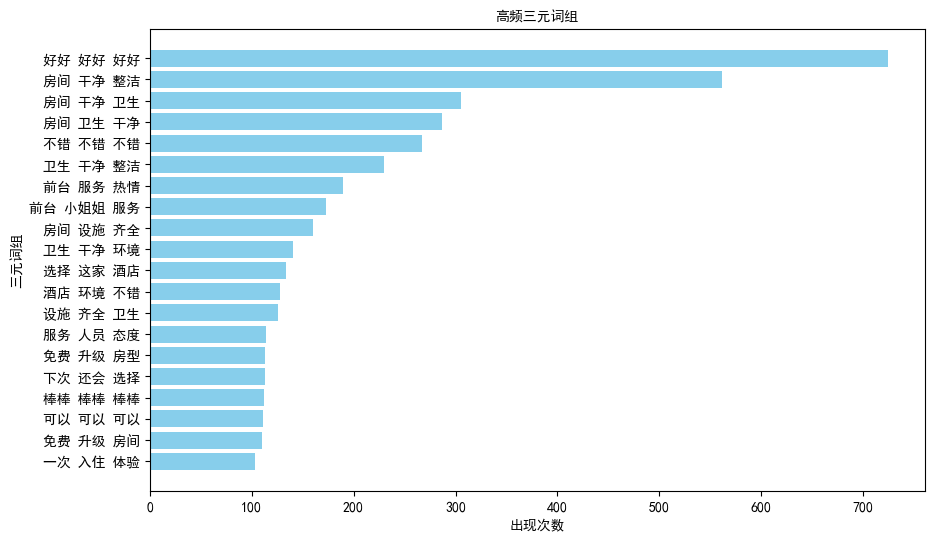

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from matplotlib.font_manager import FontProperties
import jieba

# 设置支持中文的字体
font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号无法显示的问题

# 读取CSV文件
df = pd.read_csv(r'amywork/reviewdata.csv', encoding='utf-8')

# 对评论文本进行分词
df['分词'] = df['酒店评论'].apply(lambda x: ' '.join(jieba.cut(x)))

# 使用CountVectorizer提取二元词组
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df['分词'])

# 获取二元词组和频率
n_grams = vectorizer.get_feature_names_out()
n_gram_counts = X.sum(axis=0).A1

# 创建DataFrame并排序
n_gram_df = pd.DataFrame({'n_gram': n_grams, 'count': n_gram_counts})
n_gram_df = n_gram_df.sort_values(by='count', ascending=False).head(20)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(n_gram_df['n_gram'], n_gram_df['count'], color='skyblue')
plt.title('高频二元词组', fontproperties=font_prop)
plt.xlabel('出现次数', fontproperties=font_prop)
plt.ylabel('二元词组', fontproperties=font_prop)
plt.gca().invert_yaxis()
plt.show()


# 使用CountVectorizer提取三元词组
vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(df['分词'])

# 获取三元词组和频率
n_grams = vectorizer.get_feature_names_out()
n_gram_counts = X.sum(axis=0).A1

# 创建DataFrame并排序
n_gram_df = pd.DataFrame({'n_gram': n_grams, 'count': n_gram_counts})
n_gram_df = n_gram_df.sort_values(by='count', ascending=False).head(20)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(n_gram_df['n_gram'], n_gram_df['count'], color='skyblue')
plt.title('高频三元词组', fontproperties=font_prop)
plt.xlabel('出现次数', fontproperties=font_prop)
plt.ylabel('三元词组', fontproperties=font_prop)
plt.gca().invert_yaxis()
plt.show()



# 6.其他分析
## 6.1所有酒店民宿的评分分布情况
## 6.2价格与评分方关系

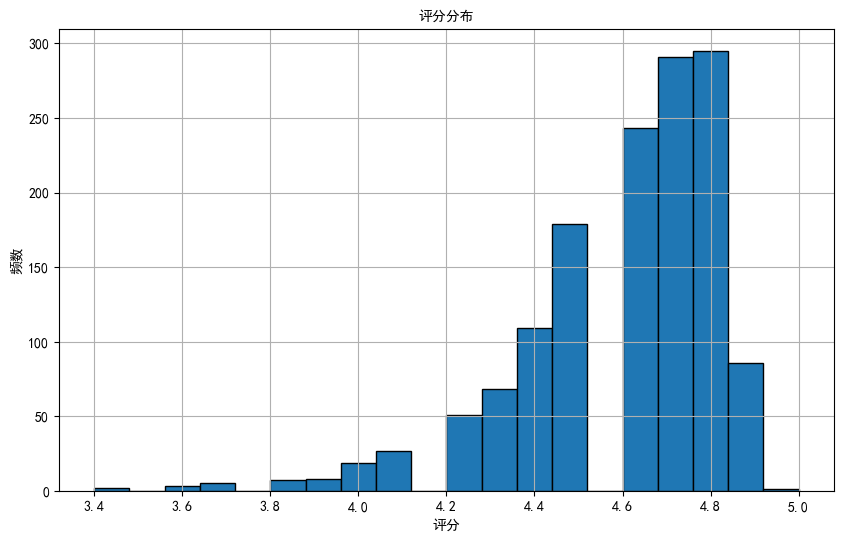

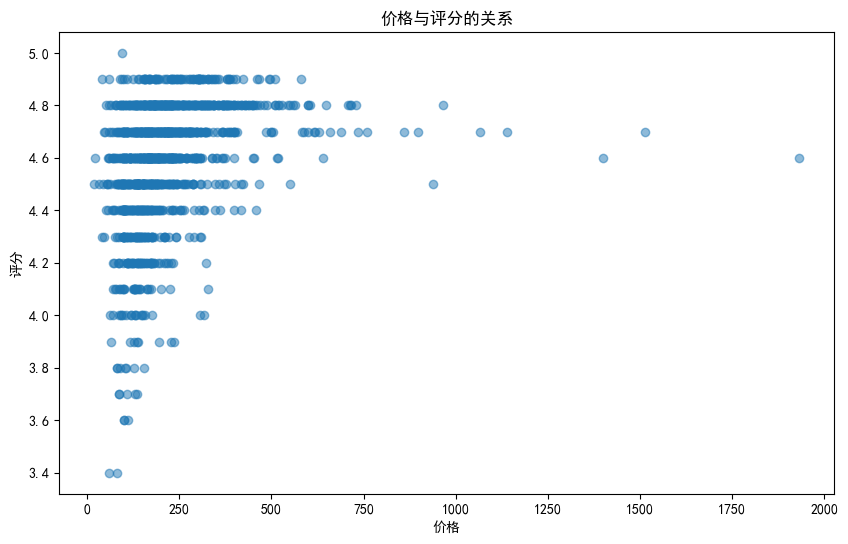

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from tqdm import tqdm

font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号无法显示的问题

df = pd.read_csv(r'amywork/detail.csv', encoding='utf-8')

# 评分分布图
plt.figure(figsize=(10, 6))
df['评分'].hist(bins=20, edgecolor='k')
plt.title('评分分布', fontproperties=font_prop)
plt.xlabel('评分', fontproperties=font_prop)
plt.ylabel('频数', fontproperties=font_prop)
plt.show()

# 按城市计算平均评分和平均价格
city_stats = df.groupby('城市').agg({'评分': 'mean', '价格': 'mean'}).reset_index()

# 散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['价格'], df['评分'], alpha=0.5)
plt.title('价格与评分的关系')
plt.xlabel('价格')
plt.ylabel('评分')
plt.show()


##  6.2距市中心的距离与价格的关系
一般来说 距中心越远价格有所降低，
这里绘制了散点图和箱型图用于分析二者的具体关系   
并使用指数衰减函数进行回归拟合

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2824\4242392889.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))


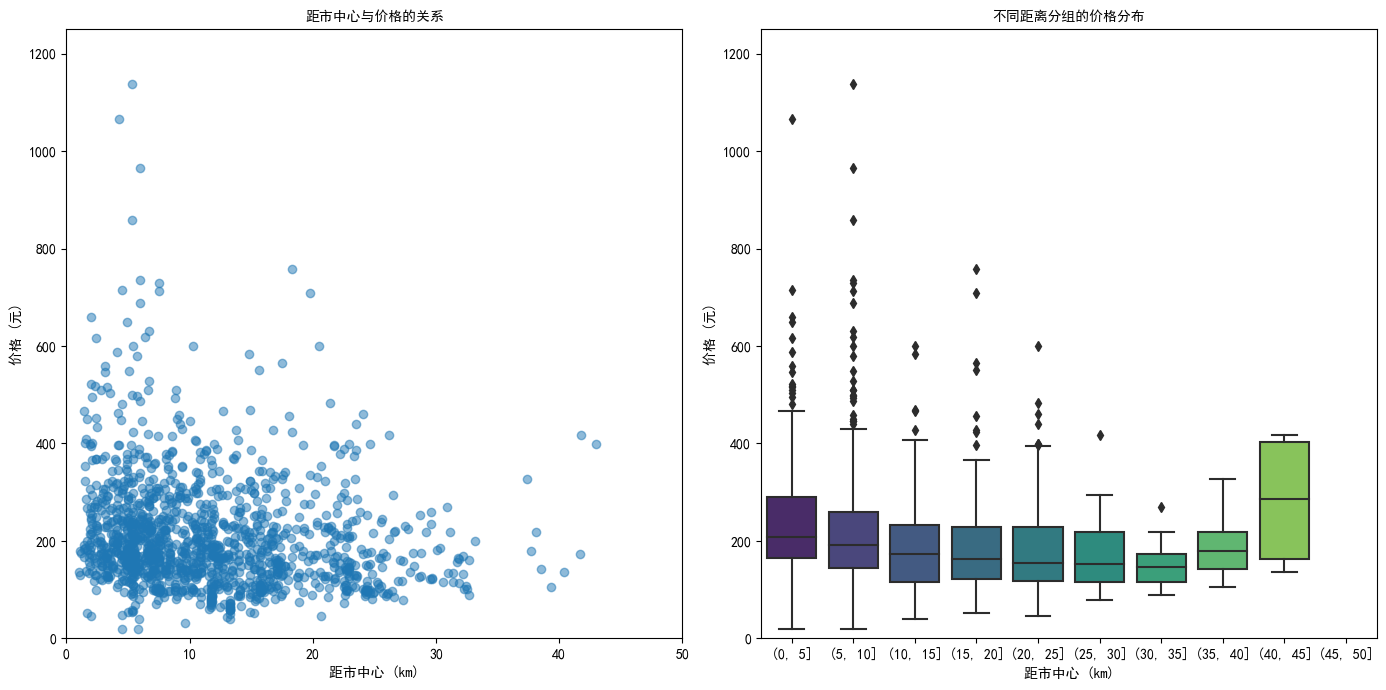

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties


font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号无法显示的问题

# 读取CSV文件
df = pd.read_csv(r'amywork/detail.csv', encoding='utf-8')


df['距市中心'] = df['距市中心'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# 过滤数据范围
df_filtered = df[(df['距市中心'] <= 50) & (df['价格'] <= 1250)]

# 绘制距市中心与价格的关系散点图
plt.figure(figsize=(14, 7))

# 子图1: 距市中心与价格的关系散点图
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['距市中心'], df_filtered['价格'], alpha=0.5)
plt.title('距市中心与价格的关系', fontproperties=font_prop)
plt.xlabel('距市中心 (km)', fontproperties=font_prop)
plt.ylabel('价格 (元)', fontproperties=font_prop)
plt.xlim(0, 50)
plt.ylim(0, 1250)

# 箱图
df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))

# 子图2: 不同距离分组的价格分布箱图
plt.subplot(1, 2, 2)
sns.boxplot(x='距离分组', y='价格', data=df_filtered, palette='viridis')
plt.title('不同距离分组的价格分布', fontproperties=font_prop)
plt.xlabel('距市中心 (km)', fontproperties=font_prop)
plt.ylabel('价格 (元)', fontproperties=font_prop)
plt.ylim(0, 1250)

plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2824\3188051974.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))


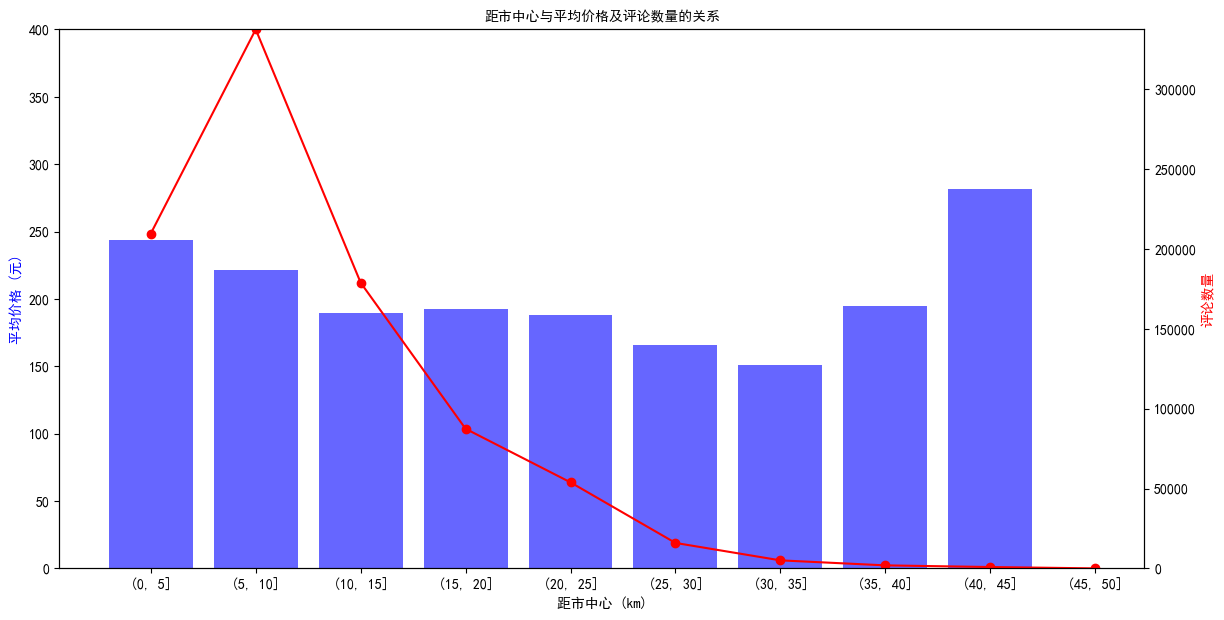

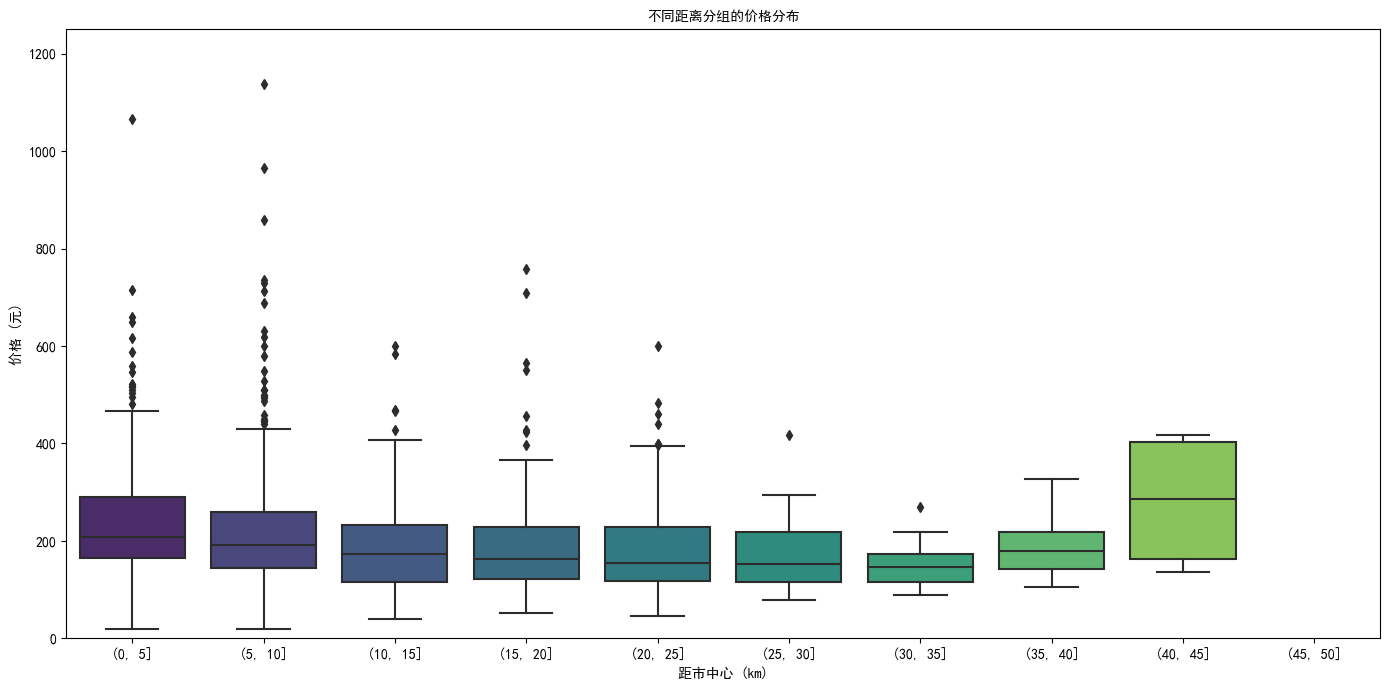

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号无法显示的问题

df = pd.read_csv(r'amywork/detail.csv', encoding='utf-8')


df['距市中心'] = df['距市中心'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# 过滤数据范围
df_filtered = df[(df['距市中心'] <= 50) & (df['价格'] <= 1250)]

# 分组数据，计算每组的平均价格和评论数量
df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))
grouped = df_filtered.groupby('距离分组').agg({'价格': 'mean', '评论': 'sum'}).reset_index()


fig, ax1 = plt.subplots(figsize=(14, 7))

# 条形图
ax1.bar(grouped['距离分组'].astype(str), grouped['价格'], color='b', alpha=0.6)
ax1.set_xlabel('距市中心 (km)', fontproperties=font_prop)
ax1.set_ylabel('平均价格 (元)', color='b', fontproperties=font_prop)
ax1.set_ylim(0, 400)

# 创建右y轴--折线图
ax2 = ax1.twinx()
ax2.plot(grouped['距离分组'].astype(str), grouped['评论'], color='r', marker='o')
ax2.set_ylabel('评论数量', color='r', fontproperties=font_prop)
ax2.set_ylim(0, grouped['评论'].max() + 10)

plt.title('距市中心与平均价格及评论数量的关系', fontproperties=font_prop)

plt.show()

# 分组绘制箱图
plt.figure(figsize=(14, 7))
sns.boxplot(x='距离分组', y='价格', data=df_filtered, palette='viridis')
plt.title('不同距离分组的价格分布', fontproperties=font_prop)
plt.xlabel('距市中心 (km)', fontproperties=font_prop)
plt.ylabel('价格 (元)', fontproperties=font_prop)
plt.ylim(0, 1250)

plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2824\3235676985.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))


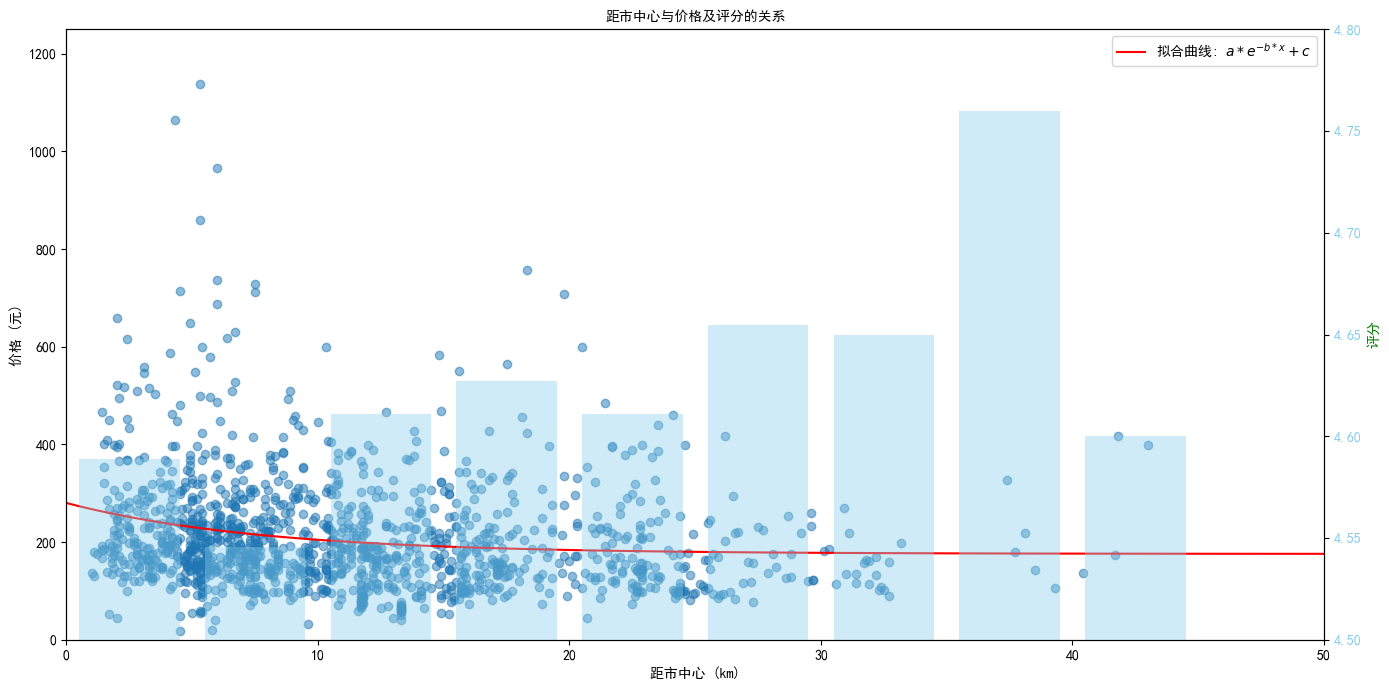

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.font_manager import FontProperties


font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False   

# 读取CSV文件
df = pd.read_csv(r'amywork/detail.csv', encoding='utf-8')

# 确保'距市中心'字段为字符串类型并提取数值部分
df['距市中心'] = df['距市中心'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# 过滤数据范围
df_filtered = df[(df['距市中心'] <= 50) & (df['价格'] <= 1250)]

# 定义指数衰减函数
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# 拟合数据
x_data = df_filtered['距市中心']
y_data = df_filtered['价格']
popt, pcov = curve_fit(exp_decay, x_data, y_data, p0=(1200, 0.1, 100))

# 计算评分的5km平均值分布
df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))
score_grouped = df_filtered.groupby('距离分组')['评分'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))

# 散点图
ax1.scatter(x_data, y_data, alpha=0.5)
ax1.set_xlabel('距市中心 (km)', fontproperties=font_prop)
ax1.set_ylabel('价格 (元)', fontproperties=font_prop)
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 1250)

# 拟合曲线
x_fit = np.linspace(0, 50, 100)
y_fit = exp_decay(x_fit, *popt)
ax1.plot(x_fit, y_fit, 'r-', label='拟合曲线: $a * e^{-b * x} + c$')
ax1.legend()

# 添加右y轴
ax2 = ax1.twinx()

# 评分的5km平均值分布条形图
positions = np.arange(2.5, 50, 5)  # 设置条形图的具体位置在每个5km区间的中间
score_means = score_grouped['评分']

ax2.bar(positions, score_means, width=4, color='skyblue', alpha=0.4)
ax2.set_ylabel('评分', color='g', fontproperties=font_prop)
ax2.tick_params(axis='y', labelcolor='skyblue')
ax2.set_ylim(4.5, 4.8)  # 右y轴范围

plt.title('距市中心与价格及评分的关系', fontproperties=font_prop)
fig.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2824\801262795.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))


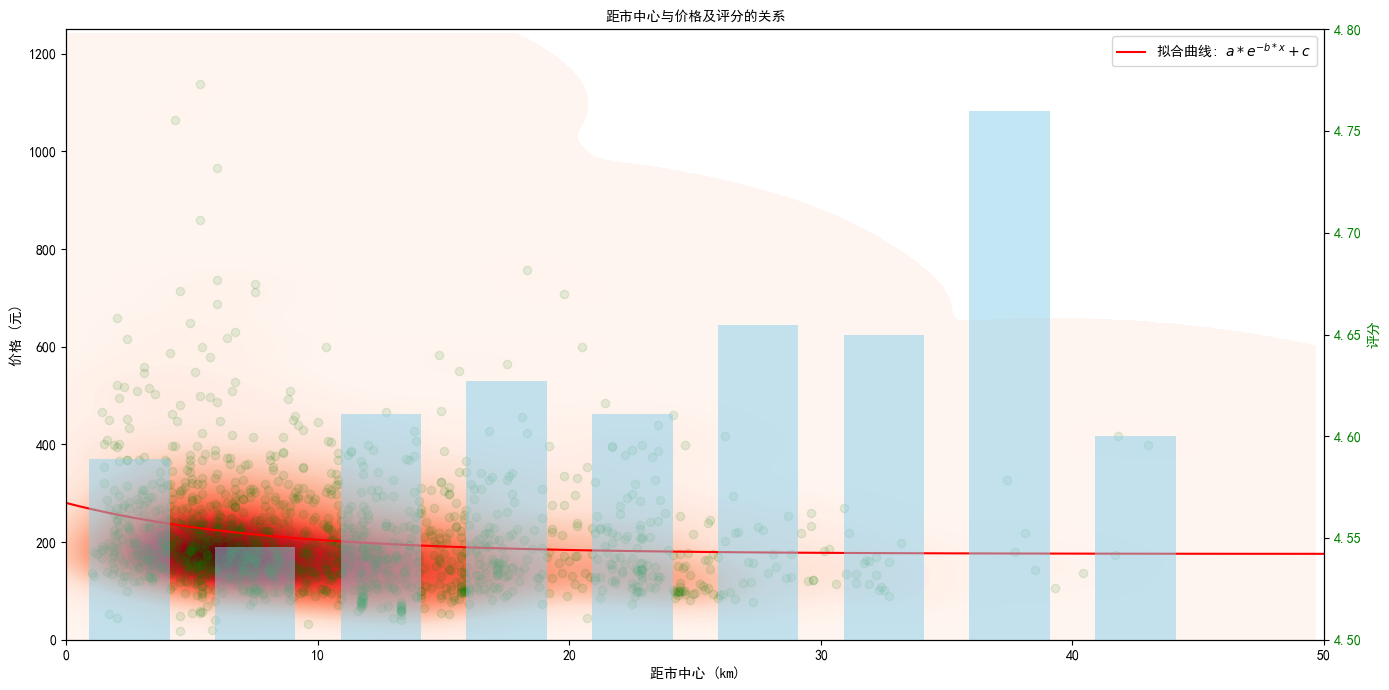

In [120]:
#密度图


font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    

# 读取CSV文件
df = pd.read_csv(r'amywork/detail.csv', encoding='utf-8')

# 确保'距市中心'字段为字符串类型并提取数值部分
df['距市中心'] = df['距市中心'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# 过滤数据范围
df_filtered = df[(df['距市中心'] <= 50) & (df['价格'] <= 1250)]

# 定义指数衰减函数
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# 拟合数据
x_data = df_filtered['距市中心']
y_data = df_filtered['价格']
popt, pcov = curve_fit(exp_decay, x_data, y_data, p0=(1200, 0.1, 100))

# 计算评分的5km平均值分布
df_filtered['距离分组'] = pd.cut(df_filtered['距市中心'], bins=range(0, 55, 5))
score_grouped = df_filtered.groupby('距离分组')['评分'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))

# 密度图
sns.kdeplot(x=x_data, y=y_data, cmap="Reds", fill=True, thresh=0, levels=100, ax=ax1)

# 透明度较低的散点图
ax1.scatter(x_data, y_data, alpha=0.1, color='g')

ax1.set_xlabel('距市中心 (km)', fontproperties=font_prop)
ax1.set_ylabel('价格 (元)', fontproperties=font_prop)
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 1250)

# 拟合曲线
x_fit = np.linspace(0, 50, 100)
y_fit = exp_decay(x_fit, *popt)
ax1.plot(x_fit, y_fit, 'r-', label='拟合曲线: $a * e^{-b * x} + c$')
ax1.legend()

# 添加右y轴
ax2 = ax1.twinx()

# 评分的5km平均值分布条形图
positions = np.arange(2.5, 50, 5)  # 设置条形图的具体位置在每个5km区间的中间
score_means = score_grouped['评分']

ax2.bar(positions, score_means, width=3.2, color='skyblue', alpha=0.5)
ax2.set_ylabel('评分', color='g', fontproperties=font_prop)
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(4.5, 4.8)  # 设置右y轴范围

plt.title('距市中心与价格及评分的关系', fontproperties=font_prop)
fig.tight_layout()
plt.show()

## 6.3 经纬度与价格的关系
能够反映中心城区的位置以及价格情况

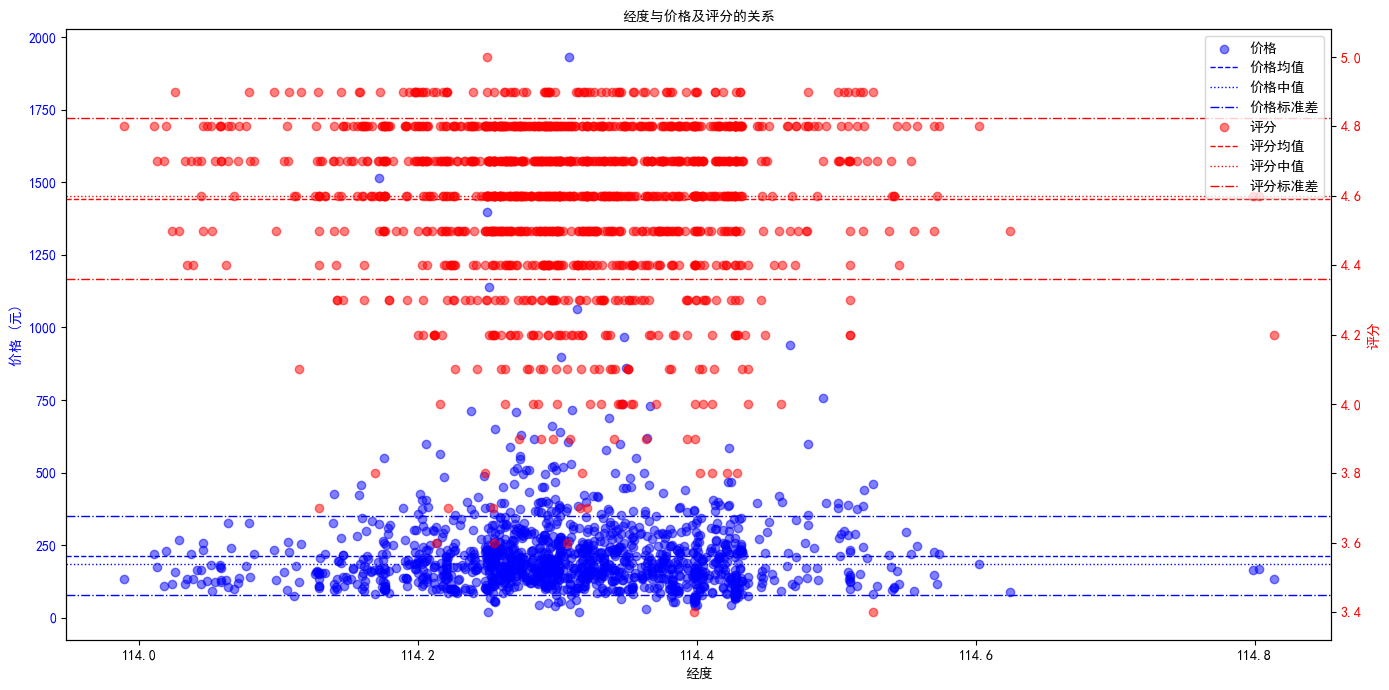

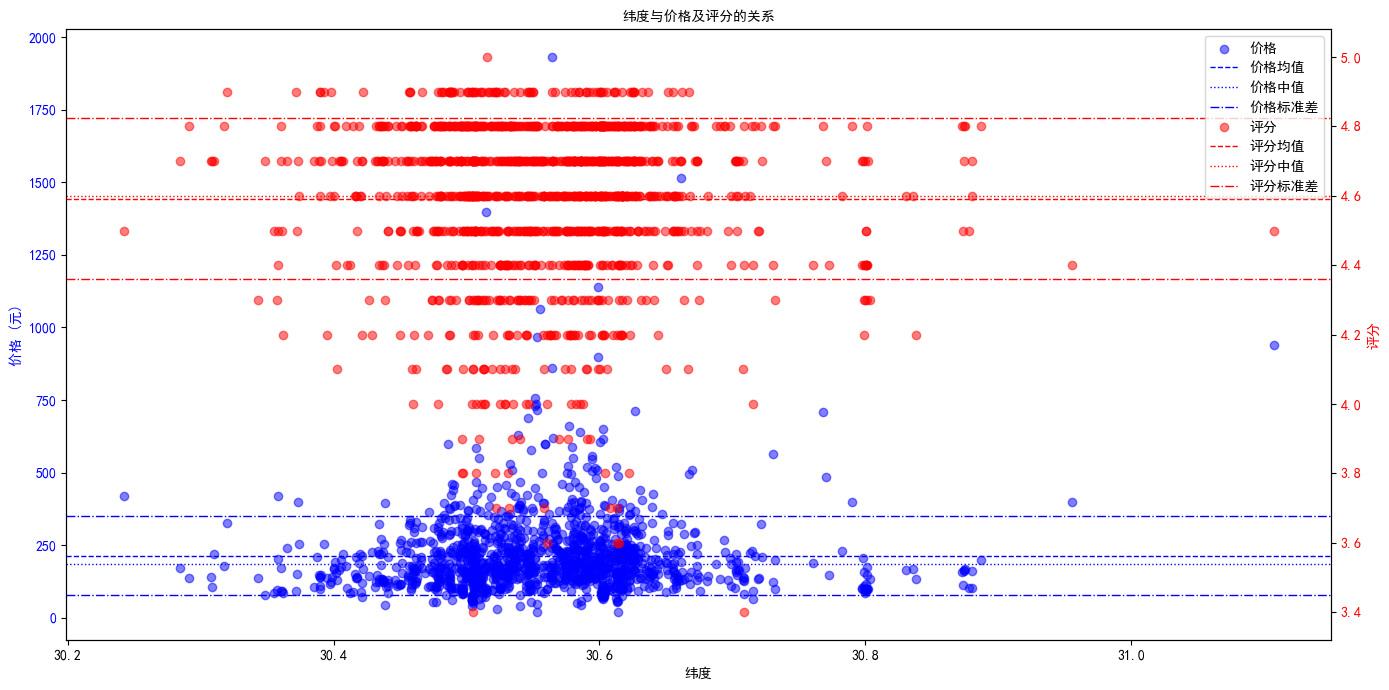

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 中文的字体
font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号无法显示的问题

# 读取CSV文件
df = pd.read_csv(r'amywork/detail.csv', encoding='utf-8')

# 数据过滤，经度和纬度合理
df_filtered = df[(df['经度'].notnull()) & (df['纬度'].notnull()) & (df['价格'].notnull()) & (df['评分'].notnull())]

# 统计量
price_mean = df_filtered['价格'].mean()
price_median = df_filtered['价格'].median()
price_std = df_filtered['价格'].std()

score_mean = df_filtered['评分'].mean()
score_median = df_filtered['评分'].median()
score_std = df_filtered['评分'].std()

# 图1：X轴为经度，左y轴为价格，右Y轴为评分
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.scatter(df_filtered['经度'], df_filtered['价格'], color='b', alpha=0.5, label='价格')
ax1.set_xlabel('经度', fontproperties=font_prop)
ax1.set_ylabel('价格 (元)', color='b', fontproperties=font_prop)
ax1.tick_params(axis='y', labelcolor='b')

# 价格的统计线
ax1.axhline(price_mean, color='b', linestyle='--', linewidth=1, label='价格均值')
ax1.axhline(price_median, color='b', linestyle=':', linewidth=1, label='价格中值')
ax1.axhline(price_mean + price_std, color='b', linestyle='-.', linewidth=1, label='价格标准差')
ax1.axhline(price_mean - price_std, color='b', linestyle='-.', linewidth=1)

ax2 = ax1.twinx()
ax2.plot(df_filtered['经度'], df_filtered['评分'], color='r', marker='o', linestyle='None', alpha=0.5, label='评分')
ax2.set_ylabel('评分', color='r', fontproperties=font_prop)
ax2.tick_params(axis='y', labelcolor='r')

# 评分的统计线
ax2.axhline(score_mean, color='r', linestyle='--', linewidth=1, label='评分均值')
ax2.axhline(score_median, color='r', linestyle=':', linewidth=1, label='评分中值')
ax2.axhline(score_mean + score_std, color='r', linestyle='-.', linewidth=1, label='评分标准差')
ax2.axhline(score_mean - score_std, color='r', linestyle='-.', linewidth=1)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('经度与价格及评分的关系', fontproperties=font_prop)
fig.tight_layout()
plt.show()

# 图2：X轴为纬度，左y轴为价格，右Y轴为评分
fig, ax3 = plt.subplots(figsize=(14, 7))

ax3.scatter(df_filtered['纬度'], df_filtered['价格'], color='b', alpha=0.5, label='价格')
ax3.set_xlabel('纬度', fontproperties=font_prop)
ax3.set_ylabel('价格 (元)', color='b', fontproperties=font_prop)
ax3.tick_params(axis='y', labelcolor='b')

# 价格的统计线
ax3.axhline(price_mean, color='b', linestyle='--', linewidth=1, label='价格均值')
ax3.axhline(price_median, color='b', linestyle=':', linewidth=1, label='价格中值')
ax3.axhline(price_mean + price_std, color='b', linestyle='-.', linewidth=1, label='价格标准差')
ax3.axhline(price_mean - price_std, color='b', linestyle='-.', linewidth=1)

ax4 = ax3.twinx()
ax4.plot(df_filtered['纬度'], df_filtered['评分'], color='r', marker='o', linestyle='None', alpha=0.5, label='评分')
ax4.set_ylabel('评分', color='r', fontproperties=font_prop)
ax4.tick_params(axis='y', labelcolor='r')

# 评分的统计线
ax4.axhline(score_mean, color='r', linestyle='--', linewidth=1, label='评分均值')
ax4.axhline(score_median, color='r', linestyle=':', linewidth=1, label='评分中值')
ax4.axhline(score_mean + score_std, color='r', linestyle='-.', linewidth=1, label='评分标准差')
ax4.axhline(score_mean - score_std, color='r', linestyle='-.', linewidth=1)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax3.transAxes)
plt.title('纬度与价格及评分的关系', fontproperties=font_prop)
fig.tight_layout()
plt.show()


## 6.4四大评分维度与总评分的关系
反映评分的分布范围以及四个评分维度与总评分的相关性

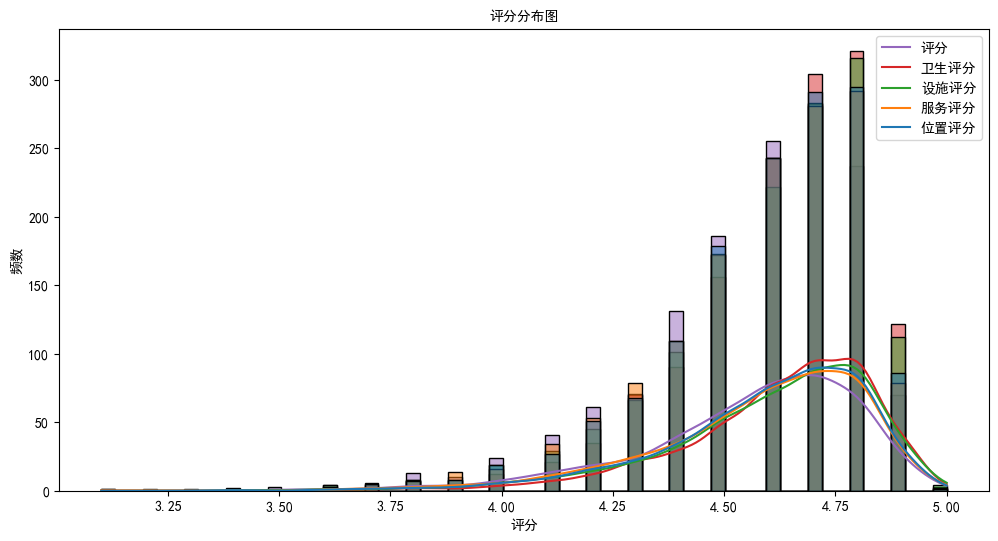

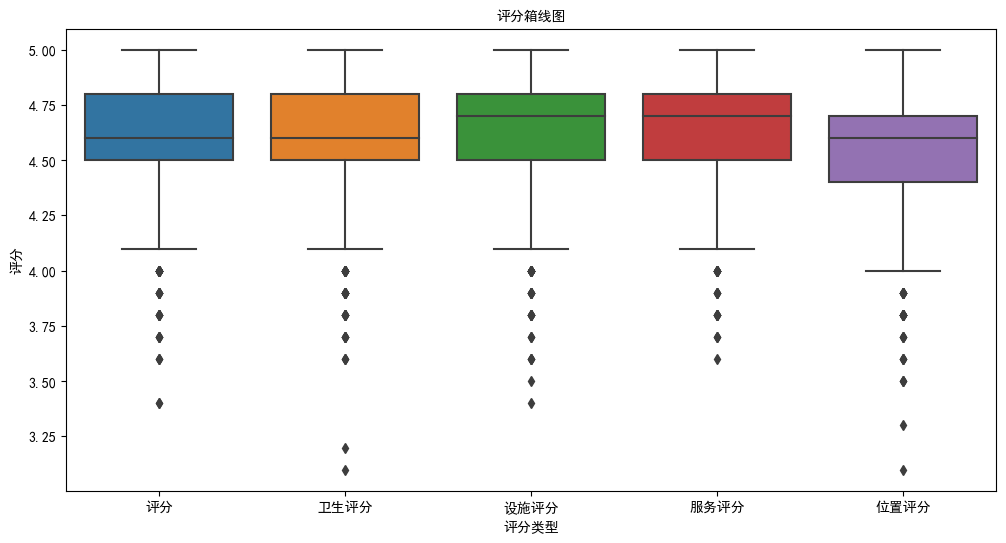

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties


font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False   

# 读取CSV文件
df = pd.read_csv(r'amywork/detail.csv', encoding='utf-8')

# 过滤数据，确保评分字段不为空
df_filtered = df.dropna(subset=['评分', '卫生评分', '设施评分', '服务评分', '位置评分'])

# 评分分布图
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered[['评分', '卫生评分', '设施评分', '服务评分', '位置评分']], kde=True)
plt.title('评分分布图', fontproperties=font_prop)
plt.xlabel('评分', fontproperties=font_prop)
plt.ylabel('频数', fontproperties=font_prop)
plt.legend(['评分', '卫生评分', '设施评分', '服务评分', '位置评分'])
plt.show()

# 评分箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[['评分', '卫生评分', '设施评分', '服务评分', '位置评分']])
plt.title('评分箱线图', fontproperties=font_prop)
plt.xlabel('评分类型', fontproperties=font_prop)
plt.ylabel('评分', fontproperties=font_prop)
plt.show()


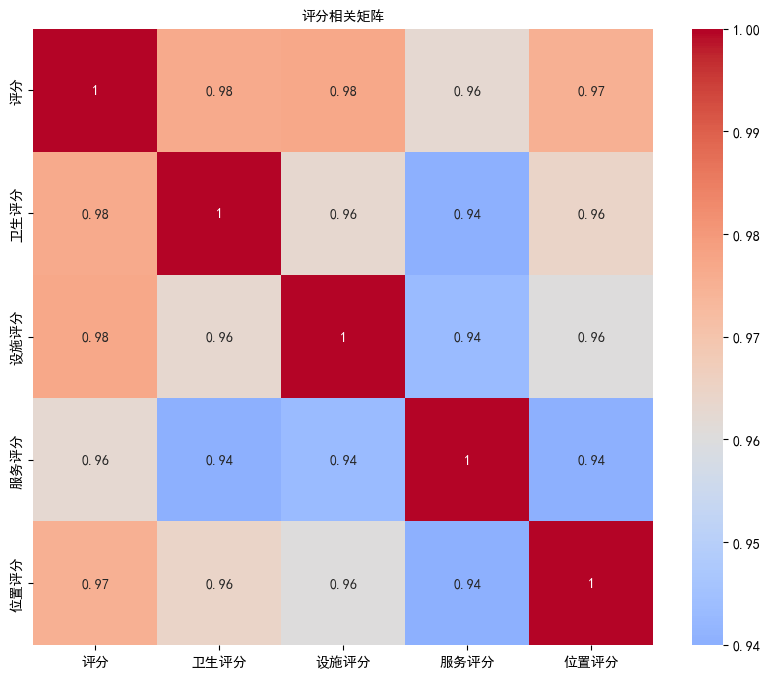

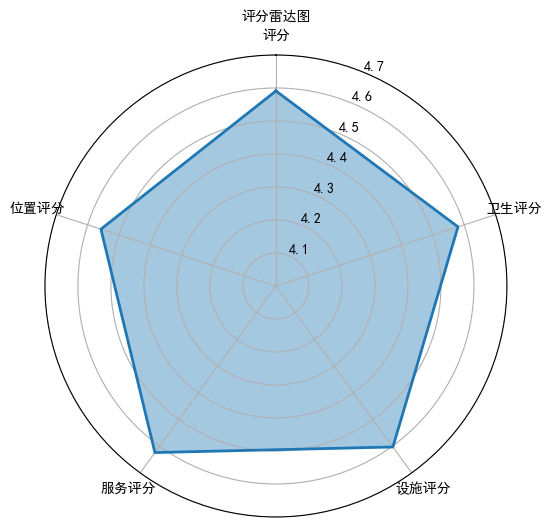

In [144]:

# 评分相关矩阵
correlation_matrix = df_filtered[['评分', '卫生评分', '设施评分', '服务评分', '位置评分']].corr()

# 调整色阶的范围以突出差异
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0.96, vmin=0.94, vmax=1)
plt.title('评分相关矩阵', fontproperties=font_prop)
plt.show()

# 评分雷达图
# 计算各评分的平均值
average_scores = df_filtered[['评分', '卫生评分', '设施评分', '服务评分', '位置评分']].mean().values

# 雷达图数据准备
labels = ['评分', '卫生评分', '设施评分', '服务评分', '位置评分']
num_vars = len(labels)

# 创建雷达图
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], labels, fontproperties=font_prop)

# 缩小雷达图的范围
ax.set_ylim(4, 4.7)

ax.plot(angles, np.append(average_scores, average_scores[0]), linewidth=2, linestyle='solid')
ax.fill(angles, np.append(average_scores, average_scores[0]), alpha=0.4)

plt.title('评分雷达图', fontproperties=font_prop)
plt.show()



### 卫生和设施对总评分影响较大